**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [80]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [81]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [82]:
model = ExchangeEconomyClass()

# Question 1

Firstly we find all the pareto improvement points by using the following code. The points we find is the different combinations of X1A and X2A that leave both players as least as well off as they were when consuming their endowment. We find these point by using the functions for utility and consumption.

In [83]:
import numpy as np

ua = model.utility_A(model.par.w1A, model.par.w2A)
ub = model.utility_B(1-model.par.w1A, 1-model.par.w2A)
N = 75

list=[]

for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        utilia = model.utility_A(x1A, x2A)
        utilib = model.utility_B(x1B, x2B)
        if utilia >= ua and utilib >= ub:
            list.append((x1A,x2A))

print(list)
x, y = zip(*list)

[(0.08, 0.9600000000000001), (0.09333333333333334, 0.88), (0.09333333333333334, 0.8933333333333334), (0.09333333333333334, 0.9066666666666667), (0.09333333333333334, 0.92), (0.09333333333333334, 0.9333333333333333), (0.09333333333333334, 0.9466666666666668), (0.09333333333333334, 0.9600000000000001), (0.10666666666666667, 0.8266666666666668), (0.10666666666666667, 0.8400000000000001), (0.10666666666666667, 0.8533333333333334), (0.10666666666666667, 0.8666666666666667), (0.10666666666666667, 0.88), (0.10666666666666667, 0.8933333333333334), (0.10666666666666667, 0.9066666666666667), (0.10666666666666667, 0.92), (0.10666666666666667, 0.9333333333333333), (0.10666666666666667, 0.9466666666666668), (0.10666666666666667, 0.9600000000000001), (0.12000000000000001, 0.7866666666666667), (0.12000000000000001, 0.8), (0.12000000000000001, 0.8133333333333334), (0.12000000000000001, 0.8266666666666668), (0.12000000000000001, 0.8400000000000001), (0.12000000000000001, 0.8533333333333334), (0.1200000

Now when we have found all the pareto improvement points, it is possible to show them in an Edgeworth box. In he first part of the code we specify the total endownment of each good. Secondly we set up the figure and create the design. After that we plot in the pareto improvemtent points in the scatter and we also illustrate the initial endowment.

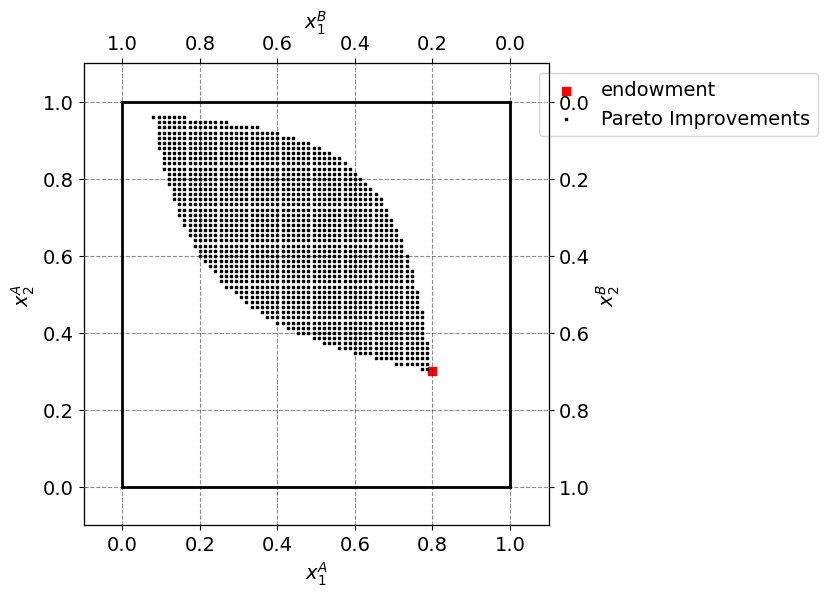

In [84]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(x,y,marker='s',color='black',label='Pareto Improvements', s=0.8)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

In this question we want to calculate the error in the market clearing condition s. Firstly we define conditions for the price of good 1. We then use the code that we have created in the ExchangeEconomy file to calculate the errors and we print them. We use the code in the end to illustrate the total market clearing error against p1 values.

        eps1      eps2
0   0.533333 -0.266667
1   0.475949 -0.250667
2   0.424096 -0.234667
3   0.377011 -0.218667
4   0.334066 -0.202667
..       ...       ...
71 -0.363231  0.869333
72 -0.365840  0.885333
73 -0.368392  0.901333
74 -0.370889  0.917333
75 -0.373333  0.933333

[76 rows x 2 columns]


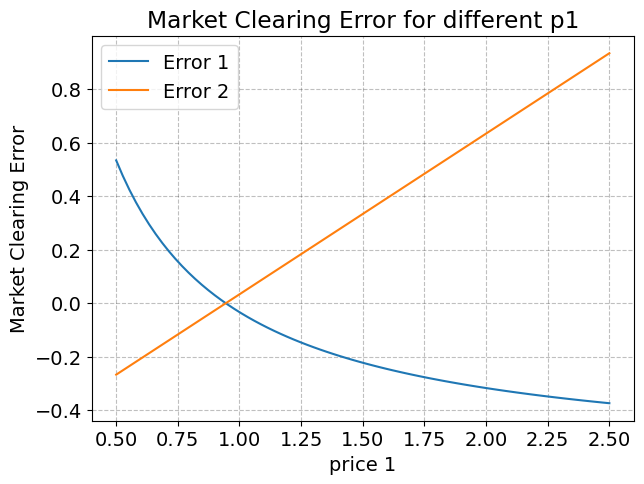

In [85]:
# 1. We start define p1 as:
p1 = [(0.5 + 2*i/75) for i in range(76)]

# 2. We calculate the errors:
errors = [model.check_market_clearing(x) for x in p1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

# 3. Pandas is imported:
import pandas as pd

# 4. Creating dataframe:
df = pd.DataFrame(errors, columns=['eps1', 'eps2'])
print(df)

# Plotting the total market clearing error against p1 values
plt.figure(figsize=(7, 5))
plt.plot(p1, eps1, label='Error 1')
plt.plot(p1, eps2, label='Error 2')
plt.xlabel('price 1')
plt.ylabel('Market Clearing Error')
plt.title('Market Clearing Error for different p1')
plt.legend()
plt.grid(True)
plt.show()


# Question 3

The market clearing price is the value of price 1 that makes the errors as small as possible. To find the market clearing price, we use code to calculate the price of good 1 where error of good 1 is the closest to zero. We find that the price then has to be 0.953.

In [86]:
# 1. EPS close to zero
eps_zero = np.abs(eps1).argmin()

# 2. Getting the price where eps1 is closest to zero
market_clearing_price = p1[eps_zero]


# 4. Print the market clearing price
print(f"The market clearing price is {market_clearing_price:.3f}.")

The market clearing price is 0.953.


# Question 4A

In [122]:
# Create an instance of the model
model = ExchangeEconomyClass()

# Define the set of prices P1
N = 75  # Adjust N as needed
P1 = np.linspace(0.5, 2.5, N+1)

# Define the objective function to maximize agent A's utility
def objective(p1):
    xB1, xB2 = model.demand_B(p1)
    return -model.utility_A(1 - xB1, 1 - xB2)

# Choose an initial guess for p1
p1_initial_guess = 1.0

# Define bounds for p1 based on P1
min_price = min(P1)
max_price = max(P1)
bounds = [(min_price, max_price)]

# Perform optimization to maximize agent A's utility
result = minimize(objective, p1_initial_guess, bounds=bounds)

# Extract the optimal price p1
p1_optimal = result.x[0]

# Calculate the resulting allocation for agent A using the optimal price
xB1_optimal, xB2_optimal = model.demand_B(p1_optimal)
xA1_optimal = 1 - xB1_optimal
xA2_optimal = 1 - xB2_optimal

# Calculate the utility of agent A for the resulting allocation
utility_A_optimal = model.utility_A(xA1_optimal, xA2_optimal)

# Print the optimal allocation and utility for agent A
print("The resulting allocation maximizing agent A's utility with prices in P1 is:")
print(f"xA1 = {xA1_optimal:.2f}, xA2 = {xA2_optimal:.2f}")
print(f"Utility for agent A: {utility_A_optimal:.2f}")
print(f"Price 1: {p1_optimal:.2f}")
print(f"Optimal xB1: {xB1_optimal:.2f}")
print(f"Optimal xB2: {xB2_optimal:.2f}")


The resulting allocation maximizing agent A's utility with prices in P1 is:
xA1 = 0.62, xA2 = 0.64
Utility for agent A: 0.63
Price 1: 1.90
Optimal xB1: 0.38
Optimal xB2: 0.36


In [124]:
#4B
# Create an instance of the model
model = ExchangeEconomyClass()

# Define the range of positive prices to search over
num_points = 75
positive_prices = np.linspace(0.01, 1e6, num_points)  # Adjust upper bound as needed

# Define the objective function to maximize agent A's utility
def objective(p1):
    xB1, xB2 = model.demand_B(p1)
    return -model.utility_A(1 - xB1, 1 - xB2)

# Choose an initial guess for p1
p1_initial_guess = 1.0

# Define bounds for p1 based on P1
min_price = min(P1)
max_price = max(P1)
bounds = [(min_price, max_price)]

# Perform optimization to maximize agent A's utility
result = minimize(objective, p1_initial_guess, bounds=bounds)

# Extract the optimal price p1
p1_optimal = result.x[0]

# Calculate the resulting allocation for agent A using the optimal price
xB1_optimal, xB2_optimal = model.demand_B(p1_optimal)
xA1_optimal = 1 - xB1_optimal
xA2_optimal = 1 - xB2_optimal

# Calculate the utility of agent A for the resulting allocation
utility_A_optimal = model.utility_A(xA1_optimal, xA2_optimal)

# Print the optimal allocation and utility for agent A
print("The resulting allocation maximizing agent A's utility with prices in P1 is:")
print(f"xA1 = {xA1_optimal:.2f}, xA2 = {xA2_optimal:.2f}")
print(f"Utility for agent A: {utility_A_optimal:.2f}")
print(f"Price 1: {p1_optimal:.2f}")
print(f"Optimal xB1: {xB1_optimal:.2f}")
print(f"Optimal xB2: {xB2_optimal:.2f}")


The resulting allocation maximizing agent A's utility with prices in P1 is:
xA1 = 0.62, xA2 = 0.64
Utility for agent A: 0.63
Price 1: 1.90
Optimal xB1: 0.38
Optimal xB2: 0.36


In [125]:
# 5a Initialize variables to store the best allocation
ua_best = -np.inf
xA_best = None
xB_best = None

# Parameters for iterating over constraint set C
N = 75

# Iterate over constraint set C
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A
        utilia = model.utility_A(x1A, x2A)
        utilib = model.utility_B(x1B, x2B)
        if utilia >= ua_best and utilib >= model.utility_B(model.par.w1A, model.par.w2A):  # Ensure B is not worse off than in the initial endowment
            ua_best = utilia
            xA_best = (x1A, x2A)
            xB_best = (x1B, x2B)

# Print the optimal allocation for A and B within the constraint set C
print("The optimal allocation within the constraint set C is:")
print(f"xA1 = {xA_best[0]:.2f}, xA2 = {xA_best[1]:.2f}")
print(f"xB1 = {xB_best[0]:.2f}, xB2 = {xB_best[1]:.2f}")
print(f"Utility for agent A: {ua_best:.2f}")

The optimal allocation within the constraint set C is:
xA1 = 0.31, xA2 = 0.60
xB1 = 0.69, xB2 = 0.40
Utility for agent A: 0.48


In [127]:
#5B
# Define the objective function to maximize A's utility
def objective(x):
    return -model.utility_A(x[0], x[1])

# Define the constraint function to ensure B's utility is not lower than in the initial endowment
def constraint(x):
    x1B = 1 - x[0]
    x2B = 1 - x[1]
    return model.utility_B(x1B, x2B) - model.utility_B(model.par.w1A, model.par.w2A)

# Define the initial guess for xA1 and xA2
x0 = [0.5, 0.5]  # Starting point for optimization

# Define the bounds for xA1 and xA2 (within [0, 1])
bounds = ((0, 1), (0, 1))

# Perform optimization to maximize A's utility subject to the constraint
result = minimize(objective, x0, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint})

# Extract the optimal allocation for A
xA_optimal = result.x
x1B_optimal = 1 - xA_optimal[0]
x2B_optimal = 1 - xA_optimal[1]

# Calculate the utility for A
utility_A = -result.fun

# Print the optimal allocation for A, x1B, x2B, and utility for A
print("Optimal Allocation:")
print(f"xA1 = {xA_optimal[0]:.2f}, xA2 = {xA_optimal[1]:.2f}")
print(f"x1B = {x1B_optimal:.2f}, x2B = {x2B_optimal:.2f}")
print(f"Utility for agent A: {utility_A:.2f}")


Optimal Allocation:
xA1 = 0.29, xA2 = 0.62
x1B = 0.71, x2B = 0.38
Utility for agent A: 0.48


In [128]:
#6A
# Objective function to maximize the sum of utilities
def objective(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(model.utility_A(xA1, xA2) + model.utility_B(xB1, xB2))

# Initial guess for xA1 and xA2
x0 = [0.5, 0.5]

# Define bounds for xA1 and xA2
bounds = ((0, 1), (0, 1))

# Perform optimization to maximize the sum of utilities
result = minimize(objective, x0, bounds=bounds)

# Extract the optimal allocation for agent A
xA_optimal = result.x
xB_optimal = (1 - xA_optimal[0], 1 - xA_optimal[1])

# Calculate utility for A and B
util_A = model.utility_A(xA_optimal[0], xA_optimal[1])
util_B = model.utility_B(xB_optimal[0], xB_optimal[1])

# Print the optimal allocation for A and B along with utility values
print("The resulting allocation maximizing aggregate utility is:")
print(f"xA1 = {xA_optimal[0]:.2f}, xA2 = {xA_optimal[1]:.2f}")
print(f"xB1 = {xB_optimal[0]:.2f}, xB2 = {xB_optimal[1]:.2f}")
print(f"Utility for agent A: {util_A:.2f}")
print(f"Utility for agent B: {util_B:.2f}")


The resulting allocation maximizing aggregate utility is:
xA1 = 0.33, xA2 = 0.67
xB1 = 0.67, xB2 = 0.33
Utility for agent A: 0.53
Utility for agent B: 0.53


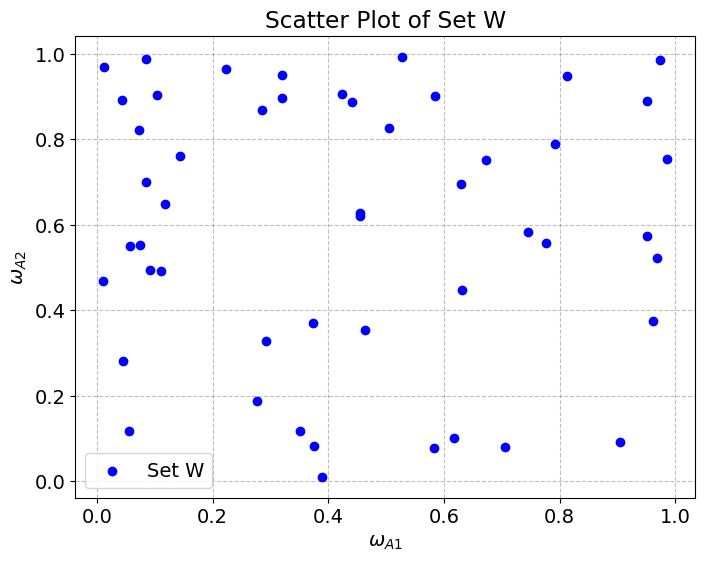

In [92]:
#7.
# Draw a set W with 50 elements
W = np.random.rand(50, 2)

# Extract the x and y coordinates
x_coords = W[:, 0]
y_coords = W[:, 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color='blue', label='Set W')
plt.title('Scatter Plot of Set W')
plt.xlabel('$\omega_{A1}$')
plt.ylabel('$\omega_{A2}$')
plt.legend()
plt.grid(True)
plt.show()
